In [22]:
import pandas as pd
import numpy as np

In [23]:
train_data = pd.read_csv('training_twitter_x_y_train.csv')
train_data.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [24]:
train_data.shape

(10980, 12)

In [25]:
train_data.isnull().sum()

tweet_id                      0
airline_sentiment             0
airline                       0
airline_sentiment_gold    10949
name                          0
negativereason_gold       10956
retweet_count                 0
text                          0
tweet_coord               10204
tweet_created                 0
tweet_location             3550
user_timezone              3577
dtype: int64

In [26]:
train_data['airline_sentiment'].value_counts(dropna=False)

negative    6851
neutral     2327
positive    1802
Name: airline_sentiment, dtype: int64

In [27]:
train_data['airline_sentiment_gold'].value_counts(dropna=False)

NaN         10949
negative       24
positive        4
neutral         3
Name: airline_sentiment_gold, dtype: int64

In [28]:
train_data['negativereason_gold'].value_counts(dropna=False)

NaN                                         10956
Customer Service Issue                          9
Late Flight                                     3
Cancelled Flight                                3
Can't Tell                                      2
Late Flight\nCancelled Flight                   1
Bad Flight                                      1
Late Flight\nFlight Attendant Complaints        1
Customer Service Issue\nCan't Tell              1
Lost Luggage\nDamaged Luggage                   1
Customer Service Issue\nLost Luggage            1
Cancelled Flight\nCustomer Service Issue        1
Name: negativereason_gold, dtype: int64

In [29]:
train_data['tweet_coord'].value_counts(dropna=False) # tweet coordinates

NaN                             10204
[0.0, 0.0]                        131
[40.64656067, -73.78334045]         3
[37.99311597, -84.52114659]         2
[32.91792297, -97.00367737]         2
                                ...  
[25.7789509, -80.1353866]           1
[33.89611413, -84.33113356]         1
[33.93871373, -118.40746172]        1
[37.62063433, -122.38946673]        1
[40.6467516, -73.77465033]          1
Name: tweet_coord, Length: 633, dtype: int64

In [30]:
train_data['user_timezone'].value_counts(dropna=False)

NaN                           3577
Eastern Time (US & Canada)    2819
Central Time (US & Canada)    1489
Pacific Time (US & Canada)     921
Quito                          546
                              ... 
Monterrey                        1
Mazatlan                         1
Jerusalem                        1
Copenhagen                       1
Warsaw                           1
Name: user_timezone, Length: 79, dtype: int64

<AxesSubplot:>

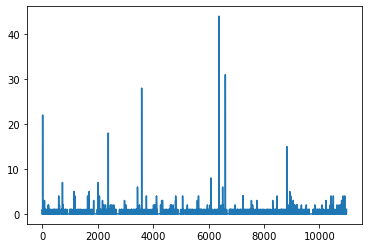

In [31]:
train_data['retweet_count'].plot() # x axis is the ith example , y represents the value corrs to ith example

In [79]:
train_data.fillna('?',inplace=True)

In [80]:
# dropping un wanted columns
col = ['tweet_id','airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location']
df = train_data.drop(col,axis=1)

In [81]:
df['all_text'] = df['airline']+' '+df['text']+' '+df['user_timezone']
df['all_text'] = df['all_text'].str.lower()

In [82]:
df = df.drop(['airline','text','user_timezone'],axis=1)

In [83]:
df.head()

,airline_sentiment,all_text
0,negative,southwest @southwestair i am scheduled for the...
1,positive,southwest @southwestair seeing your workers ti...
2,positive,united @united flew ord to miami and back and ...
3,negative,southwest @southwestair @dultch97 that's horse...
4,negative,united @united so our flight into ord was dela...


In [92]:
import string
from nltk.corpus import stopwords
import re

In [93]:
stop_words = set(stopwords.words('english'))
stop_words.update(list(set(string.punctuation)))
print(len(stop_words))

211


In [95]:
def clean_text(text):
    # below is for removing hashtag ,tags@ ,numbers and non alpha numeric chars
    dd = ' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    dd = ' '.join([i for i in dd.split() if len(i)>1])
    dd = ' '.join([i for i in dd.split() if i not in stop_words])
    return dd

clean_text(df['all_text'][9])

'southwest yeah haha never one expensive much fun central time us canada'

In [96]:
df['all_text'] = df['all_text'].apply(lambda x: clean_text(str(x)))

In [97]:
for i in df['all_text'].values[:10]:
    print(i)
    print()

southwest scheduled morning days fact yes sure evening flight one cancelled flightled atlantic time canada

southwest seeing workers time time going beyond love flying guys thank central time us canada

united flew ord miami back great crew service legs thanks central time us canada

southwest horse radish atlantic time canada

united flight ord delayed air force one last flight sbn 20 mins landed eastern time us canada

united load us flying sardine knew pilots hours late flight beyond belief pacific time us canada

delta stock response delays frustrating poor cust serv amp told ppl wait amp come back quito

delta nice hoping rack enough miles take trip seattle enjoy perfect latte city coffee eastern time us canada

united frankly worse customer service ever problems happen deal defines company never united

southwest yeah haha never one expensive much fun central time us canada



In [99]:
# encoding target
def convert(x):
    if x=='negative':
        return 0
    elif x=='positive':
        return 1
    else:
        return 2
df['airline_sentiment'] =  df['airline_sentiment'].apply(lambda x: convert(x))

In [100]:
df.head()

,airline_sentiment,all_text
0,0,southwest scheduled morning days fact yes sure...
1,1,southwest seeing workers time time going beyon...
2,1,united flew ord miami back great crew service ...
3,0,southwest horse radish atlantic time canada
4,0,united flight ord delayed air force one last f...


In [102]:
df['airline_sentiment'].value_counts()

0    6851
2    2327
1    1802
Name: airline_sentiment, dtype: int64

In [103]:
X = df['all_text'].values
Y = df['airline_sentiment'].values

In [105]:
len(X),len(Y)

(10980, 10980)

In [110]:
from sklearn.feature_extraction.text import CountVectorizer

vect_ = CountVectorizer()
vectors = vect_.fit_transform(X)

# print("Vocabulary: ", vect_.vocabulary_)

vectors.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(vectors,Y,random_state=122)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(8235, 10024) (8235,)
(2745, 10024) (2745,)


In [121]:
from sklearn.metrics import classification_report

In [123]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83      1689
           1       0.65      0.53      0.58       447
           2       0.57      0.41      0.48       609

    accuracy                           0.73      2745
   macro avg       0.67      0.61      0.63      2745
weighted avg       0.71      0.73      0.71      2745



In [127]:
test_data = pd.read_csv('test_twitter_x_test.csv')
test_data.head()

,tweet_id,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,569682010270101504,American,NaN,zsalim03,NaN,0,@AmericanAir In car gng to DFW. Pulled over 1h...,NaN,2015-02-22 18:15:50 -0800,Texas,Central Time (US & Canada)
1,569608307184242688,American,NaN,sa_craig,NaN,0,"@AmericanAir after all, the plane didn’t land ...",NaN,2015-02-22 13:22:57 -0800,"College Station, TX",Central Time (US & Canada)
2,567879304593408001,Southwest,NaN,DanaChristos,NaN,1,@SouthwestAir can't believe how many paying cu...,NaN,2015-02-17 18:52:31 -0800,CT,Eastern Time (US & Canada)
3,569757651539660801,US Airways,NaN,rossj987,NaN,0,@USAirways I can legitimately say that I would...,NaN,2015-02-22 23:16:24 -0800,"Washington, D.C.",Eastern Time (US & Canada)
4,569900705852608513,American,NaN,tranpham18,NaN,0,@AmericanAir still no response from AA. great ...,NaN,2015-02-23 08:44:51 -0800,New York City,Eastern Time (US & Canada)


In [129]:
test_data.fillna('?',inplace=True)

# dropping un wanted columns
col = ['tweet_id','airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location']
df1 = test_data.drop(col,axis=1)
df1['all_text'] = df1['airline']+' '+df1['text']+' '+df1['user_timezone']
df1['all_text'] = df1['all_text'].str.lower()

df1 = df1.drop(['airline','text','user_timezone'],axis=1)

df1['all_text'] = df1['all_text'].apply(lambda x: clean_text(str(x)))

df1.head()

,all_text
0,american car gng dfw pulled 1hr ago icy roads ...
1,american plane land identical worse conditions...
2,southwest believe many paying customers left h...
3,us airways legitimately say would rather drive...
4,american still response aa great job guys east...


In [131]:
test_vectors = vect_.transform(df1['all_text'])
test_vectors.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [132]:
# main model
clf = RandomForestClassifier()
clf.fit(vectors,Y)

y_pred = clf.predict(test_vectors)

In [133]:
y_pred

array([0, 0, 0, ..., 2, 1, 0])

In [137]:
y = []
for i in y_pred:
    if i==0:
        y.append('negative')
    elif i==1:
        y.append('positive')
    else:
        y.append('neutral')
len(y)==len(y_pred)

True

In [139]:
np.savetxt(fname='submission_countvect.csv', X=y, fmt='%s')

## Trying TFIDF

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tf_idf_vectors = tfidf.fit_transform(X)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(vectors,Y,random_state=122)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=2000, n_jobs=-1)
m.fit(x_train,y_train)

y_pred = m.predict(x_test)


print(classification_report(y_test,y_pred))

(8235, 10024) (8235,)
(2745, 10024) (2745,)
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1689
           1       0.66      0.55      0.60       447
           2       0.58      0.41      0.48       609

    accuracy                           0.73      2745
   macro avg       0.67      0.62      0.64      2745
weighted avg       0.72      0.73      0.72      2745



In [142]:
mm = RandomForestClassifier(n_estimators=2000, n_jobs=-1)
mm.fit(vectors,Y)

y = mm.predict(test_vectors)
y1 = []
for i in y:
    if i==0:
        y1.append('negative')
    elif i==1:
        y1.append('positive')
    else:
        y1.append('neutral')
len(y1)==len(y)

True

In [144]:
np.savetxt(fname='submission_tfidfvect.csv', X=y1, fmt='%s')